In [ ]:
!pip install rebound reboundx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using cached rebound-4.4.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (786 kB)
  Created wheel for reboundx: filename=reboundx-4.4.0-cp310-cp310-linux_x86_64.whl size=291809 sha256=a7d2f2102bfafb1797edbbc03e4a3c89c2767152ef80b732b4253178e1a37514
  Stored in directory: /root/.cache/pip/wheels/ce/52/44/a18f458e68b0894f6d90c8b12eea2b79420cfac7c15339a5aa
Successfully built reboundx


# Imports

In [ ]:
#Phase 3(Introducing Graviton)
#Bepi-Colombo Mission
#Imports
import rebound
import reboundx
import numpy as np
import matplotlib.pyplot as plt
from reboundx import constants
from scipy.interpolate import interp1d

In [ ]:
params = {'legend.fontsize': 'xx-large',
          'figure.titlesize': 'xx-large',
          'figure.subplot.top': 0.93,
          'figure.subplot.wspace': 0.3,
          'figure.figsize': (7,6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [ ]:
sim = rebound.Simulation()
sim.units = ('days', 'km', 'kg')

# Defining Common parameters

In [ ]:

Nobj = 5 #considering 3 planets, sun, Bepi
year = 365 #in days
tmax = 10 #days
# Nout = int(3*tmax) #per day 3 time samples
time_step = (60/86400) #in days# everyday 8hrs tracking in every 60sec
samp = ((8/24)/time_step)#per day how many data sample
Nout = round(samp*tmax)#how many sample in 10 days
#Nout = int(480*tmax)
print(Nout)
sim.c = 3e5*86400 #km/day light speed
c2 = sim.c**2
cm2 = 1/c2
sim.G = 6.67430e-20*(86400**2) #gravitational constant km3 kg-1 days-2
times = np.linspace(0, tmax, Nout)

Jcentury = 36525 #days
arcsec = 4.8481368e-06 #in rad
period_mercury= 88 #days

4800


In [ ]:
Jcentury = 36525 #days
arcsec = 4.8481368e-06 #in rad
period_mercury= 88 #days


# Initial parameters (SPICE BEPI COLOMBO)

In [ ]:
mercury_x= 46088671.22889903
mercury_y= 17423615.515467957
mercury_z= -2742278.1329949
mercury_vx= -27.278071481898525
mercury_vy= 47.50246889781066
mercury_vz= 6.38427653379923

earth_x= 116535299.24682154
earth_y= 91090203.7090667
earth_z= 7002.7180410809815
earth_vx= -18.886395720072205
earth_vy= 23.305303655847617
earth_vz= -0.000608065810169478

bepi_x= 46061192.175843544
bepi_y= 17252752.368236057
bepi_z= -2736191.7237738287
bepi_vx= -27.057110127709606
bepi_vy= 47.26234809792773
bepi_vz= 6.404299380352967

# Defining simulation setup

In [ ]:
#defining simulation setup
def setupsim():
	sim = rebound.Simulation()
	sim.units = ('days', 'km', 'kg')
	sim.add(m = 1.989e30, hash = "sun")
	# sim.add(m = 3.285e23, x=49499776.82069295, y=-33332090.081709605, z=-7203457.823496873, vx=17.14724158142263*86400, vy=42.98081670808874*86400, vz=1.9402420218504748*86400, hash = "mercury")
	sim.add(m = 3.285e23, x=mercury_x, y=mercury_y, z=mercury_z, vx=mercury_vx*86400, vy=mercury_vy*86400, vz=mercury_vz*86400, hash = "mercury")
	sim.add(m = 1150, x=bepi_x, y=bepi_y, z=bepi_z, vx=bepi_vx*86400, vy=bepi_vy*86400, vz=bepi_vz*86400, hash = "bepi")

	#sim.add(m= 4.867e24, x=99056416.04662599, y=42658515.05341787,z=-5114738.725606915,vx=-14.143052389070228, vy=31.934908515297447,vz=1.2551784587941217, hash='Venus')
	# sim.add(m= 5.972e24, x=133539638.73838262, y=64968127.88008125,z=9090.368434660137,vx=-13.622802438996763*86400, vy=26.61811665489768*86400,vz=-0.0028125020290747926*86400, hash='Earth')
	sim.add(m= 5.972e24, x=earth_x, y=earth_y,z=earth_z,vx=earth_vx*86400, vy=earth_vy*86400,vz=earth_vz*86400, hash='Earth')
	sim.add(m=1.898e27, a=1.0704e6, e=0.0014, hash="jupiter")
	#sim.add(m=5.683e26, hash='Saturn')
	#sim.add(m=8.681e25, hash='Uranus')
	#sim.add(m=1.024e26, hash='Neptune')
	# sim.add(m=9.1e20, hash='Ceres')
	# sim.add(m=2.108e20, hash='Pallas')
	# sim.add(m=2.589e20, hash='Vesta')

	return sim

#  PPN for different masses of Graviton:
https://pdglive.lbl.gov/Particle.action?node=G033&init=0

In [ ]:
#####################################1###############################
def PPN_1(reb_sim, particles, force , dt):#refers to GR
    m_g = 5.63e-59
    # ps = reb_sim.particles
    # ps = ps2
    # print(particles[0].)
    # ps = sim_MG_0.particles
    c = 3e5*86400 #km/day
    c2 = c**2
    cm2 = 1/c2
    G = 6.67430e-20*(86400**2) #km^3 kg^-1 days^-2
    gam = 1.
    bet = 1.
    h = 5.7249e-36 #planck constant in kg.km^2.days^-1
    ## m_g value cant be zero
    lam = h/(c*m_g) #compoton wavelength, related to the mass of graviton (strength of Yukawa suppression)
    r_vect = np.zeros((Nobj,Nobj,3))
    r2 = np.zeros((Nobj,Nobj))
    r = np.zeros((Nobj,Nobj))
    newt = np.zeros((Nobj,Nobj,3))
    mu = np.zeros(Nobj)
    v2 = np.zeros(Nobj)

    v_dot_v = np.zeros((Nobj,Nobj))
    r_dot_a = np.zeros((Nobj,Nobj))
    r_dot_vt = np.zeros((Nobj,Nobj))
    r_dot_va = np.zeros((Nobj,Nobj))
    for i in range(0,Nobj):
        mu[i] = G*ps[i].m
        v2[i] = ps[i].vx**2 + ps[i].vy**2 + ps[i].vz**2
    for i in range(0,Nobj):

        for j in range(0,Nobj):
            if (j!=i):
                r_vect[i,j,0] = ps[j].x-ps[i].x
                r_vect[i,j,1] = ps[j].y-ps[i].y
                r_vect[i,j,2] = ps[j].z-ps[i].z
                r_vect[j,i,0] = -r_vect[i,j,0]
                r_vect[j,i,1] = -r_vect[i,j,1]
                r_vect[j,i,2] = -r_vect[i,j,2]
                r2[i,j] = r_vect[i,j,0]**2 + r_vect[i,j,1]**2 + r_vect[i,j,2]**2
                r2[j,i] = r2[i,j]
                r[i,j] = np.sqrt(r2[i,j])
                r[j,i] = r[i,j]
                newt[i,j,0] = mu[i]*r_vect[i,j,0]/(r2[i,j]*r[i,j])
                newt[i,j,1] = mu[i]*r_vect[i,j,1]/(r2[i,j]*r[i,j])
                newt[i,j,2] = mu[i]*r_vect[i,j,2]/(r2[i,j]*r[i,j])
                v_dot_v[i,j] = ps[i].vx*ps[j].vx + ps[i].vy*ps[j].vy + ps[i].vz*ps[j].vz
                r_dot_a[i,j] = r_vect[i,j,0]*ps[i].ax + r_vect[i,j,1]*ps[i].ay + r_vect[i,j,2]*ps[i].az
                r_dot_vt[i,j] = r_vect[i,j,0]*ps[j].vx + r_vect[i,j,1]*ps[j].vy + r_vect[i,j,2]*ps[j].vz
                r_dot_va[i,j] = r_vect[i,j,0]*ps[i].vx + r_vect[i,j,1]*ps[i].vy + r_vect[i,j,2]*ps[i].vz

    for i in range(0,Nobj):
        for j in range(0,Nobj):

            if (j!=i):
                ps[j].ax += cm2* (-newt[i,j,0] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vx-ps[i].vx)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ax/r[i,j])+(1/(2*(lam**2)))*(mu[i]*r_vect[i, j, 0]/r[i,j])
                ps[j].ay += cm2* (-newt[i,j,1] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vy-ps[i].vy)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ay/r[i,j])+(1/(2*(lam**2)))*(mu[i]*r_vect[i, j, 1]/r[i,j])
                ps[j].az += cm2* (-newt[i,j,2] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vz-ps[i].vz)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].az/r[i,j])+(1/(2*(lam**2)))*(mu[i]*r_vect[i, j, 2]/r[i,j])
                for b in range(0,Nobj):
                    if (b!=j):
                        ps[j].ax += cm2* (newt[i,j,0]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].ay += cm2* (newt[i,j,1]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].az += cm2* (newt[i,j,2]*2*(gam+bet)*mu[b]/r[j,b])
                    if (b!=i):
                        ps[j].ax += cm2* (newt[i,j,0]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].ay += cm2* (newt[i,j,1]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].az += cm2* (newt[i,j,2]*(2*bet-1)*mu[b]/r[i,b])



    # for i in range(0,Nobj):#taking consideration of graviton
    #     # ps[i].ax += lam*ps[i].x
    #     # ps[i].ay += lam*ps[i].y
    #     # ps[i].az += lam*ps[i].z

    #     (1/2*(lam**2))*(mu[i]*r_vect[i, j, 0]/r[i,j])#x
    #     (1/2*(lam**2))*(mu[i]*r_vect[i, j, 1]/r[i,j])#y
    #     (1/2*(lam**2))*(mu[i]*r_vect[i, j, 2]/r[i,j])#z
    #     print(ps[i].ax)
    #     print(ps[i].ay)
    #     print(ps[i].az)
    # print("done!!!!")

########### 2 #############

def PPN_2(reb_sim, particles, force , dt):#refers to GR
    m_g = 1.43e-69
    # ps = reb_sim.particles
    # ps= particles
    c = 3e5*86400 #km/day
    c2 = c**2
    cm2 = 1/c2
    G = 6.67430e-20*(86400**2) #km^3 kg^-1 days^-2
    gam = 1.
    bet = 1.
    h = 5.7249e-36 #planck constant in kg.km^2.days^-1
    ## m_g value cant be zero
    lam = h/(c*m_g)#compoton wavelength, related to the mass of graviton (strength of Yukawa suppression)
    r_vect = np.zeros((Nobj,Nobj,3))
    r2 = np.zeros((Nobj,Nobj))
    r = np.zeros((Nobj,Nobj))
    newt = np.zeros((Nobj,Nobj,3))
    mu = np.zeros(Nobj)
    v2 = np.zeros(Nobj)

    v_dot_v = np.zeros((Nobj,Nobj))
    r_dot_a = np.zeros((Nobj,Nobj))
    r_dot_vt = np.zeros((Nobj,Nobj))
    r_dot_va = np.zeros((Nobj,Nobj))

    for i in range(0,Nobj):
        mu[i] = G*ps[i].m
        v2[i] = ps[i].vx**2 + ps[i].vy**2 + ps[i].vz**2
    for i in range(0,Nobj):
        for j in range(0,Nobj):
            if (j!=i):
                r_vect[i,j,0] = ps[j].x-ps[i].x
                r_vect[i,j,1] = ps[j].y-ps[i].y
                r_vect[i,j,2] = ps[j].z-ps[i].z
                r_vect[j,i,0] = -r_vect[i,j,0]
                r_vect[j,i,1] = -r_vect[i,j,1]
                r_vect[j,i,2] = -r_vect[i,j,2]
                r2[i,j] = r_vect[i,j,0]**2 + r_vect[i,j,1]**2 + r_vect[i,j,2]**2
                r2[j,i] = r2[i,j]
                r[i,j] = np.sqrt(r2[i,j])
                r[j,i] = r[i,j]
                newt[i,j,0] = mu[i]*r_vect[i,j,0]/(r2[i,j]*r[i,j])
                newt[i,j,1] = mu[i]*r_vect[i,j,1]/(r2[i,j]*r[i,j])
                newt[i,j,2] = mu[i]*r_vect[i,j,2]/(r2[i,j]*r[i,j])
                v_dot_v[i,j] = ps[i].vx*ps[j].vx + ps[i].vy*ps[j].vy + ps[i].vz*ps[j].vz
                r_dot_a[i,j] = r_vect[i,j,0]*ps[i].ax + r_vect[i,j,1]*ps[i].ay + r_vect[i,j,2]*ps[i].az
                r_dot_vt[i,j] = r_vect[i,j,0]*ps[j].vx + r_vect[i,j,1]*ps[j].vy + r_vect[i,j,2]*ps[j].vz
                r_dot_va[i,j] = r_vect[i,j,0]*ps[i].vx + r_vect[i,j,1]*ps[i].vy + r_vect[i,j,2]*ps[i].vz
    for i in range(0,Nobj):
        for j in range(0,Nobj):
            if (j!=i):
                ps[j].ax += cm2* (-newt[i,j,0] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vx-ps[i].vx)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ax/r[i,j])+(1/(2*(lam**2)))*(mu[i]*r_vect[i, j, 0]/r[i,j])
                ps[j].ay += cm2* (-newt[i,j,1] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vy-ps[i].vy)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ay/r[i,j])+(1/(2*(lam**2)))*(mu[i]*r_vect[i, j, 1]/r[i,j])
                ps[j].az += cm2* (-newt[i,j,2] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vz-ps[i].vz)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].az/r[i,j])+(1/(2*(lam**2)))*(mu[i]*r_vect[i, j, 2]/r[i,j])
                for b in range(0,Nobj):
                    if (b!=j):
                        ps[j].ax += cm2* (newt[i,j,0]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].ay += cm2* (newt[i,j,1]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].az += cm2* (newt[i,j,2]*2*(gam+bet)*mu[b]/r[j,b])
                    if (b!=i):
                        ps[j].ax += cm2* (newt[i,j,0]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].ay += cm2* (newt[i,j,1]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].az += cm2* (newt[i,j,2]*(2*bet-1)*mu[b]/r[i,b])

    # for i in range(0,Nobj):#taking consideration of graviton
    #     ps[i].ax += lam*ps[i].x
    #     ps[i].ay += lam*ps[i].y
    #     ps[i].az += lam*ps[i].z

#############3 ####################3

def PPN_3(reb_sim, particles, force , dt):#refers to GR
    m_g = 3.57e-64
    # ps = reb_sim.particles
    # ps = particles
    c = 3e5*86400 #km/day
    c2 = c**2
    cm2 = 1/c2
    G = 6.67430e-20*(86400**2) #km^3 kg^-1 days^-2
    gam = 1.
    bet = 1.
    h = 5.7249e-36 #planck constant in kg.km^2.days^-1
    ## m_g value cant be zero
    lam = h/(c*m_g)#compoton wavelength, related to the mass of graviton (strength of Yukawa suppression)
    r_vect = np.zeros((Nobj,Nobj,3))
    r2 = np.zeros((Nobj,Nobj))
    r = np.zeros((Nobj,Nobj))
    newt = np.zeros((Nobj,Nobj,3))
    mu = np.zeros(Nobj)
    v2 = np.zeros(Nobj)

    v_dot_v = np.zeros((Nobj,Nobj))
    r_dot_a = np.zeros((Nobj,Nobj))
    r_dot_vt = np.zeros((Nobj,Nobj))
    r_dot_va = np.zeros((Nobj,Nobj))

    for i in range(0,Nobj):
        mu[i] = G*ps[i].m
        v2[i] = ps[i].vx**2 + ps[i].vy**2 + ps[i].vz**2
    for i in range(0,Nobj):
        for j in range(0,Nobj):
            if (j!=i):
                r_vect[i,j,0] = ps[j].x-ps[i].x
                r_vect[i,j,1] = ps[j].y-ps[i].y
                r_vect[i,j,2] = ps[j].z-ps[i].z
                r_vect[j,i,0] = -r_vect[i,j,0]
                r_vect[j,i,1] = -r_vect[i,j,1]
                r_vect[j,i,2] = -r_vect[i,j,2]
                r2[i,j] = r_vect[i,j,0]**2 + r_vect[i,j,1]**2 + r_vect[i,j,2]**2
                r2[j,i] = r2[i,j]
                r[i,j] = np.sqrt(r2[i,j])
                r[j,i] = r[i,j]
                newt[i,j,0] = mu[i]*r_vect[i,j,0]/(r2[i,j]*r[i,j])
                newt[i,j,1] = mu[i]*r_vect[i,j,1]/(r2[i,j]*r[i,j])
                newt[i,j,2] = mu[i]*r_vect[i,j,2]/(r2[i,j]*r[i,j])
                v_dot_v[i,j] = ps[i].vx*ps[j].vx + ps[i].vy*ps[j].vy + ps[i].vz*ps[j].vz
                r_dot_a[i,j] = r_vect[i,j,0]*ps[i].ax + r_vect[i,j,1]*ps[i].ay + r_vect[i,j,2]*ps[i].az
                r_dot_vt[i,j] = r_vect[i,j,0]*ps[j].vx + r_vect[i,j,1]*ps[j].vy + r_vect[i,j,2]*ps[j].vz
                r_dot_va[i,j] = r_vect[i,j,0]*ps[i].vx + r_vect[i,j,1]*ps[i].vy + r_vect[i,j,2]*ps[i].vz
    for i in range(0,Nobj):
        for j in range(0,Nobj):
            if (j!=i):
                ps[j].ax += cm2* (-newt[i,j,0] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vx-ps[i].vx)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ax/r[i,j])+(1/(2*(lam**2)))*(mu[i]*r_vect[i, j, 0]/r[i,j])
                ps[j].ay += cm2* (-newt[i,j,1] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vy-ps[i].vy)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ay/r[i,j])+(1/(2*(lam**2)))*(mu[i]*r_vect[i, j, 1]/r[i,j])
                ps[j].az += cm2* (-newt[i,j,2] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vz-ps[i].vz)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].az/r[i,j])+(1/(2*(lam**2)))*(mu[i]*r_vect[i, j, 2]/r[i,j])
                for b in range(0,Nobj):
                    if (b!=j):
                        ps[j].ax += cm2* (newt[i,j,0]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].ay += cm2* (newt[i,j,1]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].az += cm2* (newt[i,j,2]*2*(gam+bet)*mu[b]/r[j,b])
                    if (b!=i):
                        ps[j].ax += cm2* (newt[i,j,0]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].ay += cm2* (newt[i,j,1]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].az += cm2* (newt[i,j,2]*(2*bet-1)*mu[b]/r[i,b])

    # for i in range(0,Nobj):#taking consideration of graviton
    #     ps[i].ax += lam*ps[i].x
    #     ps[i].ay += lam*ps[i].y
    #     ps[i].az += lam*ps[i].z



In [ ]:
m_g_val = [ 5.63e-59, 1.43e-69, 3.57e-64]#kg, second one is the max obtained from Bernus et al 2020, Normal branch minimal theory of massive gravity, Binary pulsar Galileon radiation
m_g_val_compute_output = {}
pnn_forces = {m_g_val[0]:PPN_1, m_g_val[1]: PPN_2, m_g_val[2]:  PPN_3}


In [ ]:
m_g_val[0]

5.63e-59

In [ ]:

#now we are considering the shapiro delay
def shapiro(BE,BM,EM):
  upp=BE+BM+EM
  low=BE+BM-EM
  G = 6.67430e-20*(86400**2)
  c = 3e5*86400
  m = 1.989e30
  gam=1
  T1=np.log(upp/low)
  shc=2*(1+gam)*(G*m)/(c**3)
  delay=shc*T1#shapiro time delay
  return delay




In [ ]:
#### m_g value 5.63e-59

G = 6.67430e-20*(86400**2)
c = 3e5*86400
m = 1.989e30
gam=1

m_g = m_g_val[0]
sim_MG_0 = setupsim()
sim_MG_0.integrator = "whfast"
sim_MG_0.move_to_com()
ps2 = sim_MG_0.particles
ps = sim_MG_0.particles

# sim2.additional_forces = m_g reb_sim: PPN(reb_sim, m_g)


import reboundx
rebx = reboundx.Extras(sim_MG_0)

ppn_force = rebx.create_force("ppn_force")
ppn_force.force_type = "vel"  # Since it's velocity dependent
ppn_force.update_accelerations = PPN_1
rebx.add_force(ppn_force)

# Set velocity dependence flag
sim_MG_0.force_is_velocity_dependent = 1

gh = rebx.load_force("gravitational_harmonics")
rebx.add_force(gh)
ps2["sun"].params["J2"] = 2.2e-7
ps2["sun"].params["R_eq"] = 695700




# rebx = reboundx.Extras(sim)
# mg_0_ppn= rebx.create_force("mg_0_ppn")
# mg_0_ppn.force_type = "vel"
# mg_0_ppn.update_accelerations = PPN_1
# rebx.add_force(mg_0_ppn)

x = np.zeros((Nobj,Nout))
y = np.zeros((Nobj,Nout))
z = np.zeros((Nobj,Nout))
a = np.zeros((Nobj,Nout))
e = np.zeros((Nobj,Nout))
Omega = np.zeros((Nobj,Nout))
omega = np.zeros((Nobj,Nout))
pomega = np.zeros((Nobj,Nout))
inc = np.zeros((Nobj,Nout))
# print("loop starting")
from tqdm import tqdm
for i,time in tqdm(enumerate(times)):
  sim_MG_0.integrate(time)
  # print("loop", i)
  for j in range(Nobj):
    x[j][i] = ps2[j].x
    y[j][i] = ps2[j].y
    z[j][i] = ps2[j].z
    if j>0:
      a[j][i] = ps2[j].a
      e[j][i] = ps2[j].e
      pomega[j][i] = ps2[j].pomega
      Omega[j][i] = ps2[j].Omega
      omega[j][i] = ps2[j].omega
      inc[j][i] = ps2[j].inc
print("loop done")
EM2 = np.sqrt((x[1]-x[3])**2+(y[1]-y[3])**2+(z[1]-z[3])**2)#earth-mercury distance
BE2 = np.sqrt(x[3]**2+y[3]**2+z[3]**2)#earth distance from barycenter
BM2 = np.sqrt(x[1]**2+y[1]**2+z[1]**2)#mercury distance from barycenter

#Shapiro delay in accordance with Jupiter
JE2 = np.sqrt((x[4]-x[3])**2+(y[4]-y[3])**2+(z[4]-z[3])**2)#jupiter-earth distance
JM2 = np.sqrt((x[4]-x[1])**2+(y[4]-y[1])**2+(z[4]-z[1])**2)#jupiter-mercury distance
shap_gr = shapiro(BE2, BM2, EM2)
shap_j = shapiro(JE2, JM2, EM2)#shapiro delay due to jupiter
shap_d = c*shap_gr#shapiro time delay distance
shap_dj = c*shap_j
EM_shap = EM2+shap_d #adding the effect of the shapiro delay to the earth-mercury distance
EM_j = EM2+shap_dj
m_g_val_compute_output[m_g] = {'EM2': EM2, 'BE2': BE2, 'BM2': BM2, 'JE2': JE2, 'JM2': JM2, 'shap_j': shap_j, 'shap_d': shap_d, 'shap_dj': shap_dj, 'EM_shap': EM_shap, 'EM_j': EM_j}




4800it [00:56, 85.29it/s]

loop done


In [ ]:
# G = 6.67430e-20*(86400**2)
c = 3e5*86400
m = 1.989e30
gam=1

m_g = m_g_val[1]
sim_MG_1 = setupsim()
sim_MG_1.integrator = "whfast"
sim_MG_1.move_to_com()
ps2 = sim_MG_1.particles
ps = sim_MG_1.particles

# sim2.additional_forces = m_g reb_sim: PPN(reb_sim, m_g)
# sim_MG_1.additional_forces =  PPN_2

# sim_MG_1.force_is_velocity_dependent = 1

import reboundx
rebx = reboundx.Extras(sim_MG_1)
gh = rebx.load_force("gravitational_harmonics")
rebx.add_force(gh)
ps2["sun"].params["J2"] = 2.2e-7
ps2["sun"].params["R_eq"] = 695700

ppn_force = rebx.create_force("ppn_force")
ppn_force.force_type = "vel"  # Since it's velocity dependent
ppn_force.update_accelerations = PPN_2
rebx.add_force(ppn_force)

# Set velocity dependence flag
sim_MG_1.force_is_velocity_dependent = 1

x = np.zeros((Nobj,Nout))
y = np.zeros((Nobj,Nout))
z = np.zeros((Nobj,Nout))
a = np.zeros((Nobj,Nout))
e = np.zeros((Nobj,Nout))
Omega = np.zeros((Nobj,Nout))
omega = np.zeros((Nobj,Nout))
pomega = np.zeros((Nobj,Nout))
inc = np.zeros((Nobj,Nout))
# print("loop starting")
for i,time in tqdm(enumerate(times)):
  sim_MG_1.integrate(time)
  # print("loop", i)
  for j in range(Nobj):
    x[j][i] = ps2[j].x
    y[j][i] = ps2[j].y
    z[j][i] = ps2[j].z
    if j>0:
      a[j][i] = ps2[j].a
      e[j][i] = ps2[j].e
      pomega[j][i] = ps2[j].pomega
      Omega[j][i] = ps2[j].Omega
      omega[j][i] = ps2[j].omega
      inc[j][i] = ps2[j].inc
print("loop done")
EM2 = np.sqrt((x[1]-x[3])**2+(y[1]-y[3])**2+(z[1]-z[3])**2)#earth-mercury distance
BE2 = np.sqrt(x[3]**2+y[3]**2+z[3]**2)#earth distance from barycenter
BM2 = np.sqrt(x[1]**2+y[1]**2+z[1]**2)#mercury distance from barycenter

#Shapiro delay in accordance with Jupiter
JE2 = np.sqrt((x[4]-x[3])**2+(y[4]-y[3])**2+(z[4]-z[3])**2)#jupiter-earth distance
JM2 = np.sqrt((x[4]-x[1])**2+(y[4]-y[1])**2+(z[4]-z[1])**2)#jupiter-mercury distance
shap_gr = shapiro(BE2, BM2, EM2)
shap_j = shapiro(JE2, JM2, EM2)#shapiro delay due to jupiter
shap_d = c*shap_gr#shapiro time delay distance
shap_dj = c*shap_j
EM_shap = EM2+shap_d #adding the effect of the shapiro delay to the earth-mercury distance
EM_j = EM2+shap_dj
m_g_val_compute_output[m_g] = {'EM2': EM2, 'BE2': BE2, 'BM2': BM2, 'JE2': JE2, 'JM2': JM2, 'shap_j': shap_j, 'shap_d': shap_d, 'shap_dj': shap_dj, 'EM_shap': EM_shap, 'EM_j': EM_j}




4800it [01:02, 76.65it/s]

loop done


In [ ]:
#### m_g value

G = 6.67430e-20*(86400**2)
c = 3e5*86400
m = 1.989e30
gam=1

m_g = m_g_val[2]
sim_MG_2 = setupsim()
sim_MG_2.integrator = "whfast"
sim_MG_2.move_to_com()
ps2 = sim_MG_2.particles
ps = sim_MG_2.particles

# sim2.additional_forces = m_g reb_sim: PPN(reb_sim, m_g)


import reboundx
rebx = reboundx.Extras(sim_MG_2)
gh = rebx.load_force("gravitational_harmonics")
rebx.add_force(gh)
ps2["sun"].params["J2"] = 2.2e-7
ps2["sun"].params["R_eq"] = 695700

ppn_force = rebx.create_force("ppn_force")
ppn_force.force_type = "vel"  # Since it's velocity dependent
ppn_force.update_accelerations = PPN_3
rebx.add_force(ppn_force)

# Set velocity dependence flag
sim_MG_2.force_is_velocity_dependent = 1


# rebx = reboundx.Extras(sim)
# mg_0_ppn= rebx.create_force("mg_0_ppn")
# mg_0_ppn.force_type = "vel"
# mg_0_ppn.update_accelerations = PPN_1
# rebx.add_force(mg_0_ppn)

x = np.zeros((Nobj,Nout))
y = np.zeros((Nobj,Nout))
z = np.zeros((Nobj,Nout))
a = np.zeros((Nobj,Nout))
e = np.zeros((Nobj,Nout))
Omega = np.zeros((Nobj,Nout))
omega = np.zeros((Nobj,Nout))
pomega = np.zeros((Nobj,Nout))
inc = np.zeros((Nobj,Nout))
# print("loop starting")
from tqdm import tqdm
for i,time in tqdm(enumerate(times)):
  sim_MG_2.integrate(time)
  # print("loop", i)
  for j in range(Nobj):
    x[j][i] = ps2[j].x
    y[j][i] = ps2[j].y
    z[j][i] = ps2[j].z
    if j>0:
      a[j][i] = ps2[j].a
      e[j][i] = ps2[j].e
      pomega[j][i] = ps2[j].pomega
      Omega[j][i] = ps2[j].Omega
      omega[j][i] = ps2[j].omega
      inc[j][i] = ps2[j].inc
print("loop done")
EM2 = np.sqrt((x[1]-x[3])**2+(y[1]-y[3])**2+(z[1]-z[3])**2)#earth-mercury distance
BE2 = np.sqrt(x[3]**2+y[3]**2+z[3]**2)#earth distance from barycenter
BM2 = np.sqrt(x[1]**2+y[1]**2+z[1]**2)#mercury distance from barycenter

#Shapiro delay in accordance with Jupiter
JE2 = np.sqrt((x[4]-x[3])**2+(y[4]-y[3])**2+(z[4]-z[3])**2)#jupiter-earth distance
JM2 = np.sqrt((x[4]-x[1])**2+(y[4]-y[1])**2+(z[4]-z[1])**2)#jupiter-mercury distance
shap_gr = shapiro(BE2, BM2, EM2)
shap_j = shapiro(JE2, JM2, EM2)#shapiro delay due to jupiter
shap_d = c*shap_gr#shapiro time delay distance
shap_dj = c*shap_j
EM_shap = EM2+shap_d #adding the effect of the shapiro delay to the earth-mercury distance
EM_j = EM2+shap_dj
m_g_val_compute_output[m_g] = {'EM2': EM2, 'BE2': BE2, 'BM2': BM2, 'JE2': JE2, 'JM2': JM2, 'shap_j': shap_j, 'shap_d': shap_d, 'shap_dj': shap_dj, 'EM_shap': EM_shap, 'EM_j': EM_j}




4800it [00:56, 84.64it/s]

loop done


Text(0.5, 1.0, 'Earth-Mercury Distance with Graviton addition Mass: 5.63e-59')

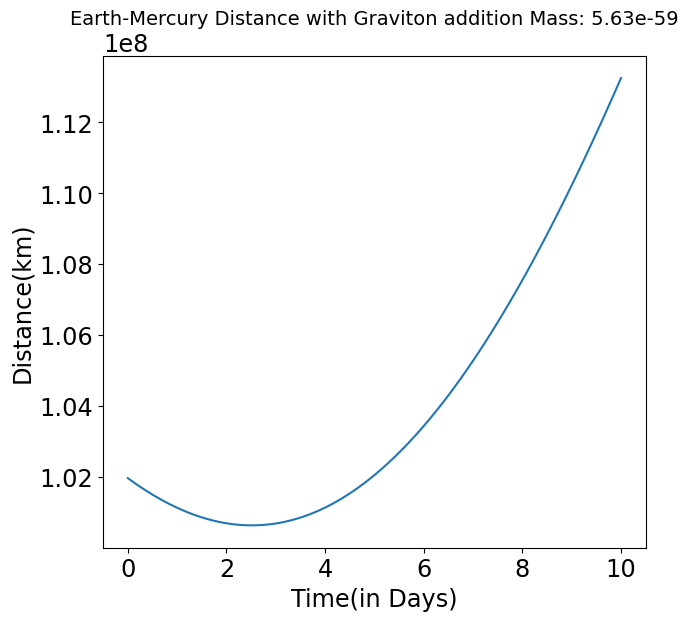

In [ ]:
plt.figure()
plt.plot(times, m_g_val_compute_output[m_g_val[0]]['EM_shap'], label="m_g = ")
#plt.plot(times, EM_shap, label="Earth-Mercury dist(shapiro+GRT)", color='red')
#plt.plot(times, EM_j, label="Earth-Mercury dist(shapiro-jupiter+GRT)", color='green')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
plt.title(f"Earth-Mercury Distance with Graviton addition Mass: {m_g_val[0]}", fontsize='14')


Text(0.5, 1.0, 'Earth-Mercury Distance with Graviton addition Mass: 5.63e-59')

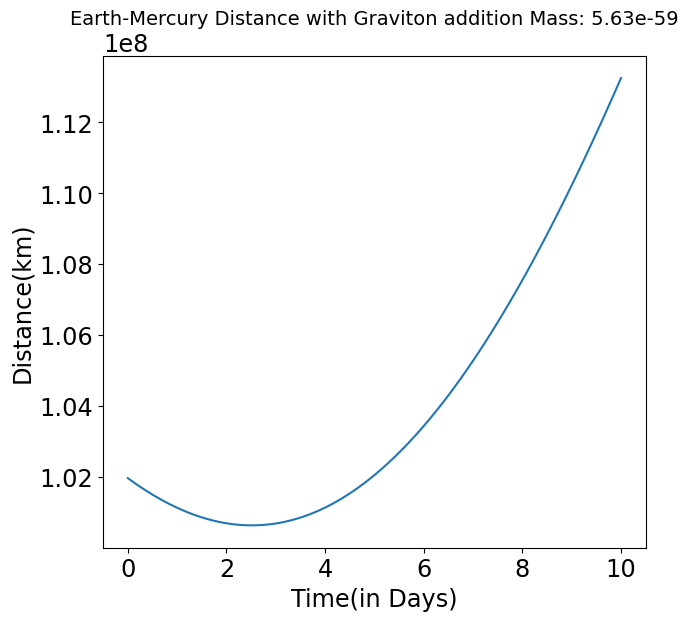

In [ ]:
plt.figure()
plt.plot(times, m_g_val_compute_output[m_g_val[0]]['EM_shap'], label="m_g = ")
#plt.plot(times, EM_shap, label="Earth-Mercury dist(shapiro+GRT)", color='red')
#plt.plot(times, EM_j, label="Earth-Mercury dist(shapiro-jupiter+GRT)", color='green')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
plt.title(f"Earth-Mercury Distance with Graviton addition Mass: {m_g_val[0]}", fontsize='14')

Text(0.5, 1.0, 'Earth-Mercury Distance with Graviton addition Mass: 1.43e-69')

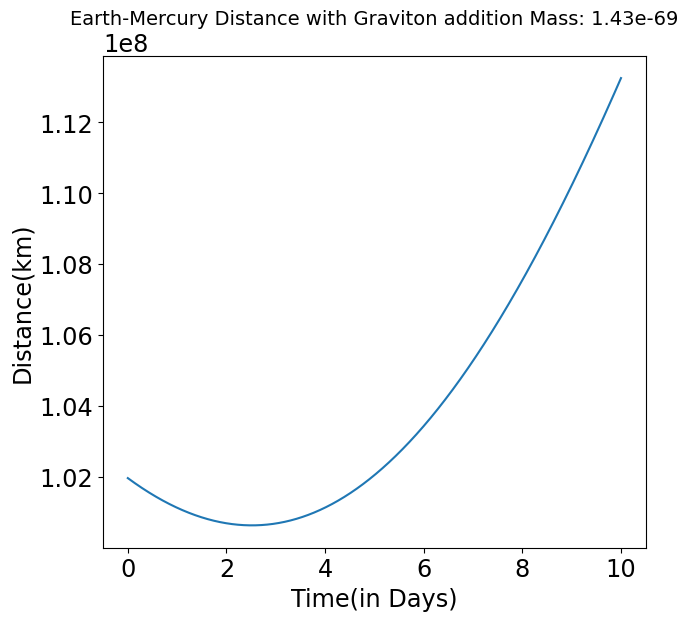

In [ ]:
plt.figure()
plt.plot(times, m_g_val_compute_output[m_g_val[1]]['EM_shap'], label="m_g = ")
#plt.plot(times, EM_shap, label="Earth-Mercury dist(shapiro+GRT)", color='red')
#plt.plot(times, EM_j, label="Earth-Mercury dist(shapiro-jupiter+GRT)", color='green')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
plt.title(f"Earth-Mercury Distance with Graviton addition Mass: {m_g_val[1]}", fontsize='14')

Text(0.5, 1.0, 'Earth-Mercury Distance with Graviton addition Mass: 3.57e-64')

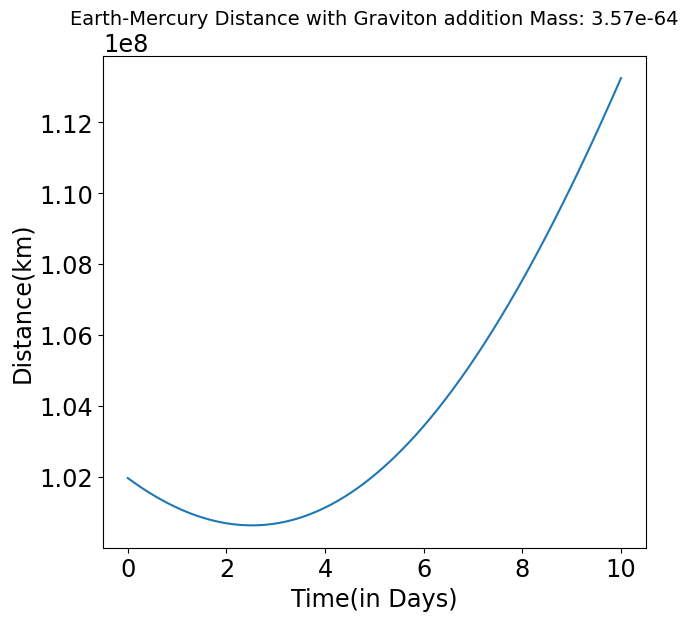

In [ ]:
plt.figure()
plt.plot(times, m_g_val_compute_output[m_g_val[2]]['EM_shap'], label="m_g = ")
#plt.plot(times, EM_shap, label="Earth-Mercury dist(shapiro+GRT)", color='red')
#plt.plot(times, EM_j, label="Earth-Mercury dist(shapiro-jupiter+GRT)", color='green')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
plt.title(f"Earth-Mercury Distance with Graviton addition Mass: {m_g_val[2]}", fontsize='14')

Text(0.5, 1.0, 'Earth-Mercury Distance Difference with Graviton as 3.57e-64 and 1.43e-69')

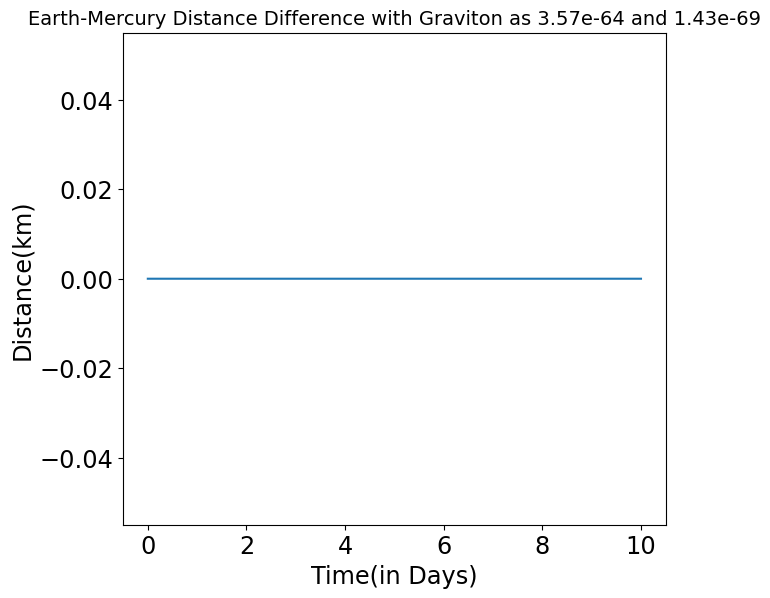

In [ ]:

plt.figure()
plt.plot(times, m_g_val_compute_output[m_g_val[2]]['EM_shap'] - m_g_val_compute_output[m_g_val[1]]['EM_shap'], label="m_g = ")
#plt.plot(times, EM_shap, label="Earth-Mercury dist(shapiro+GRT)", color='red')
#plt.plot(times, EM_j, label="Earth-Mercury dist(shapiro-jupiter+GRT)", color='green')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
plt.title(f"Earth-Mercury Distance Difference with Graviton as {m_g_val[2]} and {m_g_val[1]}", fontsize='14')

Text(0.5, 1.0, 'Earth-Mercury Distance Difference with Graviton as 3.57e-64 and 5.63e-59')

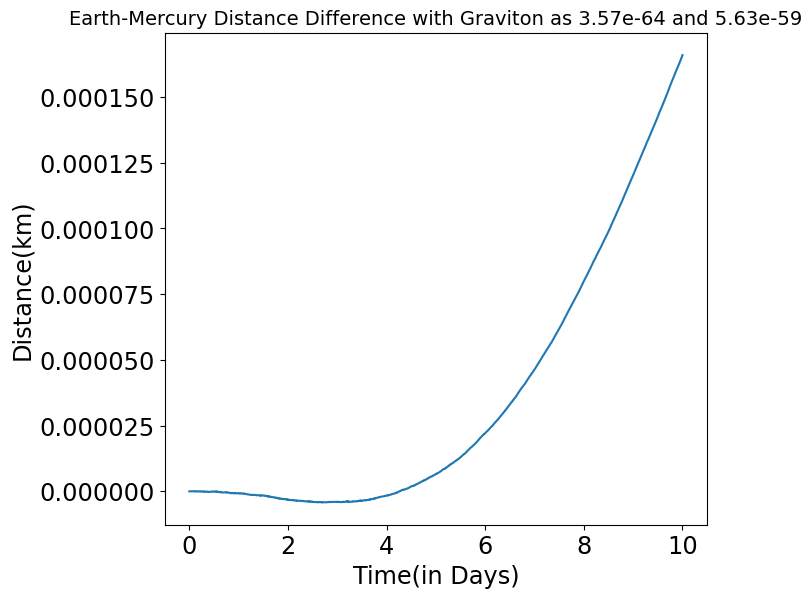

In [ ]:

plt.figure()
plt.plot(times, m_g_val_compute_output[m_g_val[2]]['EM_shap'] - m_g_val_compute_output[m_g_val[0]]['EM_shap'], label="m_g = ")
#plt.plot(times, EM_shap, label="Earth-Mercury dist(shapiro+GRT)", color='red')
#plt.plot(times, EM_j, label="Earth-Mercury dist(shapiro-jupiter+GRT)", color='green')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
plt.title(f"Earth-Mercury Distance Difference with Graviton as {m_g_val[2]} and {m_g_val[0]}", fontsize='14')

In [ ]:
m_g_val[0]

5.63e-59

In [ ]:
m_g_val_compute_output[m_g_val[2]]['EM2'] - m_g_val_compute_output[m_g_val[0]]['EM2']

array([ 0.00000000e+00, -1.51991844e-06, -5.78165054e-06, -1.30534172e-05,
       -2.29030848e-05, -3.57329845e-05, -5.09768724e-05, -6.89029694e-05,
       -8.94963741e-05, -1.12369657e-04, -1.37731433e-04, -1.65238976e-04,
       -1.94653869e-04, -2.25991011e-04, -2.59131193e-04, -2.94283032e-04,
       -3.30731273e-04, -3.68475914e-04, -4.07114625e-04, -4.46930528e-04,
       -4.87223268e-04, -5.27888536e-04, -5.69179654e-04, -6.10321760e-04,
       -6.51493669e-04, -6.91682100e-04, -7.31125474e-04, -7.68959522e-04,
       -8.05452466e-04, -8.39814544e-04, -8.71837139e-04, -9.01058316e-04,
       -9.26643610e-04, -9.48831439e-04, -9.66832042e-04, -9.80257988e-04,
       -9.88483429e-04, -9.91061330e-04, -9.87872481e-04, -9.78603959e-04,
       -9.62436199e-04, -9.39130783e-04, -9.08881426e-04, -8.70853662e-04,
       -8.25181603e-04, -7.71254301e-04, -7.09250569e-04, -6.38693571e-04,
       -5.59821725e-04, -4.73096967e-04, -3.78534198e-04, -2.76133418e-04,
       -1.66445971e-04, -

In [ ]:
import pickle as pkl

def save_data_to_pickle(filename, data):
    with open(filename, 'wb') as file:
        pkl.dump(data, file)

def load_data_from_pickle(filename):
    with open(filename, 'rb') as file:
        data = pkl.load(file)
    return data

#Partial derivative computation

In [ ]:
#refering to graviton from Bernus et al 2020
c = 3e5*86400 #km/day
m_g = 5.63e-59 # mass of graviton in kg
h = 5.7249e-36 #planck constant in kg.km^2.days^-1
## m_g value cant be zero
lam = h/(c*m_g) #compoton wavelength, related to the mass of graviton (strength of Yukawa suppression)
# lam
# print((3.92e12)-lam)
# print(lam)
# from decimal import Decimal

# '%.2E' % Decimal(lam)

-3056048944.148926
3923056048944.149


'3.92E+12'

# Computing Partial Derivatives


In [ ]:
#uncertainty values defined
dx = 0.1 #km
dy = 0.1
dz = 0.1
#dx , dy, dz same for earth and mercury
dvx = 0.0001*86400 #km/days
dvy = 0.0001*86400
dvz = 0.0001*86400
#same for earth and mercury
dj2 = 1e-8
dbet = 1e-5
dgam = 1e-5
## needs to change ( example value right now)
dlam = 1e12 ## km


c = 3e5*86400 #km/day
m_g = 5.63e-59 # mass of graviton in kg
h = 5.7249e-36 #planck constant in kg.km^2.days^-1
## m_g value cant be zero
lam = h/(c*m_g) #compoton wavelength, related to the mass of graviton (strength of Yukawa suppression)

# difference
dx_values = {'earth_x':dx,'earth_y':dy,'earth_z':dz,'earth_vx':dvx,'earth_vy':dvy,'earth_vz':dvz,'mercury_x':dx,'mercury_y':dy,'mercury_z':dz,'mercury_vx':dvx,'mercury_vy':dvy,'mercury_vz':dvz,'j2':dj2,'beta':dbet,'gamma':dgam, 'lam':dlam}
H = []
## function which runs to compute rho and rho_shap with deviations
def compute_partial():
	for key in dx_values:
		print(f"running for {key}")
		xc_params = {"earth_x": earth_x, "earth_y": earth_y, "earth_z":earth_z, "earth_vx":earth_vx*86400, "earth_vy":earth_vy*86400,"earth_vz":earth_vz*86400,
                "mercury_x":mercury_x, "mercury_y":  mercury_y , "mercury_z":  mercury_z , "mercury_vx": mercury_vx*86400 , "mercury_vy": mercury_vy*86400  , "mercury_vz":mercury_vz*86400,
                "gamma": 1, "beta": 1, "j2": 2.2e-7, "lam":lam}

		xc_params[key]  = xc_params[key] - dx_values[key]
		rho_shap, rho = run_simulation(xc_params)
		xc_params[key] = xc_params[key] + (2*dx_values[key]) # above we subtracted the deviation to add the deviation we need to add it twice as we are updating the same variable
		rho_shap2, rho = run_simulation(xc_params)
		save_data_to_pickle(f"rho_shap_{key}_add_00.pkl", rho_shap2)
		save_data_to_pickle(f"rho_shap_{key}_sub_00.pkl", rho_shap)

def run_simulation(xc_params):
  sim = rebound.Simulation()
  sim.units = ('days', 'km', 'kg')
  sim.add(m = 1.989e30, hash = "sun")
  sim.add(m = 3.285e23, x=xc_params['mercury_x'], y=xc_params['mercury_y'], z=xc_params['mercury_z'], vx=xc_params['mercury_vx'], vy=xc_params['mercury_vy'], vz=xc_params['mercury_vz'], hash = "mercury")
  sim.add(m = 1150, x=49673275.327082016, y=-33268021.38113002, z=-7200954.995758239, vx=16.886487529119044*86400, vy=43.21820603265886*86400, vz=1.9329934549900312*86400, hash = "bepi")
  sim.add(m= 5.972e24, x=xc_params['earth_x'], y=xc_params['earth_y'],z=xc_params['earth_z'],vx=xc_params['earth_vx'], vy=xc_params['earth_vy'],vz=xc_params['earth_vz'], hash='Earth')
  sim.add(m=1.898e27, a=1.0704e6, e=0.0014, hash="jupiter")
  # sim.add(m=9.1e20, hash='Ceres')
  # sim.add(m=2.108e20, hash='Pallas')
  # sim.add(m=2.589e20, hash='Vesta')

  def ppn_graviton(reb_sim, particles, force , dt):#refers to GR
    m_g = 5.63e-59 # mass of graviton in kg
    c = 3e5*86400 #km/day
    c2 = c**2
    cm2 = 1/c2
    G = 6.67430e-20*(86400**2) #km^3 kg^-1 days^-2
    gam = xc_params["gamma"]
    bet = xc_params["beta"]
    h = 5.7249e-36 #planck constant in kg.km^2.days^-1
    ## m_g value cant be zero
    # lam = h/(c*m_g) #compoton wavelength, related to the mass of graviton (strength of Yukawa suppression)
    lam = xc_params["lam"]
    r_vect = np.zeros((Nobj,Nobj,3))
    r2 = np.zeros((Nobj,Nobj))
    r = np.zeros((Nobj,Nobj))
    newt = np.zeros((Nobj,Nobj,3))
    mu = np.zeros(Nobj)
    v2 = np.zeros(Nobj)

    v_dot_v = np.zeros((Nobj,Nobj))
    r_dot_a = np.zeros((Nobj,Nobj))
    r_dot_vt = np.zeros((Nobj,Nobj))
    r_dot_va = np.zeros((Nobj,Nobj))
    for i in range(0,Nobj):
        mu[i] = G*ps[i].m
        v2[i] = ps[i].vx**2 + ps[i].vy**2 + ps[i].vz**2
    for i in range(0,Nobj):

        for j in range(0,Nobj):
            if (j!=i):
                r_vect[i,j,0] = ps[j].x-ps[i].x
                r_vect[i,j,1] = ps[j].y-ps[i].y
                r_vect[i,j,2] = ps[j].z-ps[i].z
                r_vect[j,i,0] = -r_vect[i,j,0]
                r_vect[j,i,1] = -r_vect[i,j,1]
                r_vect[j,i,2] = -r_vect[i,j,2]
                r2[i,j] = r_vect[i,j,0]**2 + r_vect[i,j,1]**2 + r_vect[i,j,2]**2
                r2[j,i] = r2[i,j]
                r[i,j] = np.sqrt(r2[i,j])
                r[j,i] = r[i,j]
                newt[i,j,0] = mu[i]*r_vect[i,j,0]/(r2[i,j]*r[i,j])
                newt[i,j,1] = mu[i]*r_vect[i,j,1]/(r2[i,j]*r[i,j])
                newt[i,j,2] = mu[i]*r_vect[i,j,2]/(r2[i,j]*r[i,j])
                v_dot_v[i,j] = ps[i].vx*ps[j].vx + ps[i].vy*ps[j].vy + ps[i].vz*ps[j].vz
                r_dot_a[i,j] = r_vect[i,j,0]*ps[i].ax + r_vect[i,j,1]*ps[i].ay + r_vect[i,j,2]*ps[i].az
                r_dot_vt[i,j] = r_vect[i,j,0]*ps[j].vx + r_vect[i,j,1]*ps[j].vy + r_vect[i,j,2]*ps[j].vz
                r_dot_va[i,j] = r_vect[i,j,0]*ps[i].vx + r_vect[i,j,1]*ps[i].vy + r_vect[i,j,2]*ps[i].vz

    for i in range(0,Nobj):
        for j in range(0,Nobj):

            if (j!=i):
                ps[j].ax += cm2* (-newt[i,j,0] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vx-ps[i].vx)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ax/r[i,j])+(1/(2*(lam**2)))*(mu[i]*r_vect[i, j, 0]/r[i,j])  # adjusting for graviton (ax)
                ps[j].ay += cm2* (-newt[i,j,1] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vy-ps[i].vy)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ay/r[i,j])+(1/(2*(lam**2)))*(mu[i]*r_vect[i, j, 1]/r[i,j])  # adjusting for graviton (ay)
                ps[j].az += cm2* (-newt[i,j,2] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vz-ps[i].vz)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].az/r[i,j])+(1/(2*(lam**2)))*(mu[i]*r_vect[i, j, 2]/r[i,j])  # adjusting for graviton (az)
                for b in range(0,Nobj):
                    if (b!=j):
                        ps[j].ax += cm2* (newt[i,j,0]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].ay += cm2* (newt[i,j,1]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].az += cm2* (newt[i,j,2]*2*(gam+bet)*mu[b]/r[j,b])
                    if (b!=i):
                        ps[j].ax += cm2* (newt[i,j,0]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].ay += cm2* (newt[i,j,1]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].az += cm2* (newt[i,j,2]*(2*bet-1)*mu[b]/r[i,b])

  G = 6.67430e-20*(86400**2)
  c = 3e5*86400
  m = 1.989e30
  sim.integrator = "whfast"
  sim.move_to_com()
  ps2 = sim.particles
  ps = sim.particles

  import reboundx
  rebx = reboundx.Extras(sim)
  gh = rebx.load_force("gravitational_harmonics")
  rebx.add_force(gh)
  ps2["sun"].params["J2"] = xc_params['j2']
  ps2["sun"].params["R_eq"] = 695700

  ppn_force = rebx.create_force("ppn_force")
  ppn_force.force_type = "vel"  # Since it's velocity dependent
  ppn_force.update_accelerations = ppn_graviton
  rebx.add_force(ppn_force)
  # Set velocity dependence flag
  sim.force_is_velocity_dependent = 1

  x = np.zeros((Nobj,Nout))
  y = np.zeros((Nobj,Nout))
  z = np.zeros((Nobj,Nout))
  a = np.zeros((Nobj,Nout))
  e = np.zeros((Nobj,Nout))
  Omega = np.zeros((Nobj,Nout))
  omega = np.zeros((Nobj,Nout))
  pomega = np.zeros((Nobj,Nout))
  inc = np.zeros((Nobj,Nout))
  # print("loop starting")
  from tqdm import tqdm
  for i,time in tqdm(enumerate(times)):
    sim.integrate(time)
    # print("loop", i)
    for j in range(Nobj):
      x[j][i] = ps2[j].x
      y[j][i] = ps2[j].y
      z[j][i] = ps2[j].z
      if j>0:
        a[j][i] = ps2[j].a
        e[j][i] = ps2[j].e
        pomega[j][i] = ps2[j].pomega
        Omega[j][i] = ps2[j].Omega
        omega[j][i] = ps2[j].omega
        inc[j][i] = ps2[j].inc
  print("loop done")
  EM2 = np.sqrt((x[1]-x[3])**2+(y[1]-y[3])**2+(z[1]-z[3])**2)#earth-mercury distance
  BE2 = np.sqrt(x[3]**2+y[3]**2+z[3]**2)#earth distance from barycenter
  BM2 = np.sqrt(x[1]**2+y[1]**2+z[1]**2)#mercury distance from barycenter

  # #Shapiro delay in accordance with Jupiter
  # JE2 = np.sqrt((x[4]-x[3])**2+(y[4]-y[3])**2+(z[4]-z[3])**2)#jupiter-earth distance
  # JM2 = np.sqrt((x[4]-x[1])**2+(y[4]-y[1])**2+(z[4]-z[1])**2)#jupiter-mercury distance

  #now we are considering the shapiro delay
  def shapiro_calc(BE,BM,EM):
    upp=BE+BM+EM
    low=BE+BM-EM
    G = 6.67430e-20*(86400**2)
    c = 3e5*86400
    m = 1.989e30
    gam=xc_params["gamma"]
    T1=np.log(upp/low)
    shc=2*(1+gam)*(G*m)/(c**3)
    delay=shc*T1#shapiro time delay
    return delay

  shap_gr = shapiro_calc(BE2, BM2, EM2)
  shap_d = c*shap_gr   #shapiro time delay distance
  EM_shap = EM2+shap_d #adding the effect of the shapiro delay to the earth-mercury distance
  return EM_shap, EM2  ## rho




In [ ]:
compute_partial()


running for earth_x


4800it [01:03, 75.13it/s]


loop done


4800it [00:58, 82.15it/s]


loop done
running for earth_y


4800it [01:02, 76.32it/s]


loop done


4800it [00:56, 85.46it/s]


loop done
running for earth_z


4800it [00:57, 83.17it/s]


loop done


4800it [00:56, 84.90it/s]


loop done
running for earth_vx


4800it [00:56, 85.34it/s]


loop done


4800it [00:56, 85.27it/s]


loop done
running for earth_vy


4800it [00:57, 84.05it/s]


loop done


4800it [00:56, 85.07it/s]


loop done
running for earth_vz


4800it [00:56, 85.13it/s]


loop done


4800it [00:56, 85.45it/s]


loop done
running for mercury_x


4800it [00:59, 80.05it/s]


loop done


4800it [00:56, 85.28it/s]


loop done
running for mercury_y


4800it [00:56, 85.31it/s]


loop done


4800it [01:01, 78.38it/s]


loop done
running for mercury_z


4800it [01:07, 71.31it/s]


loop done


4800it [00:58, 81.52it/s]


loop done
running for mercury_vx


4800it [00:57, 83.69it/s]


loop done


4800it [00:56, 85.15it/s]


loop done
running for mercury_vy


4800it [00:56, 84.88it/s]


loop done


4800it [00:56, 85.64it/s]


loop done
running for mercury_vz


4800it [00:57, 83.91it/s]


loop done


4800it [00:56, 84.31it/s]


loop done
running for j2


4800it [00:56, 85.51it/s]


loop done


4800it [00:56, 85.59it/s]


loop done
running for beta


4800it [00:57, 83.30it/s]


loop done


4800it [00:56, 84.67it/s]


loop done
running for gamma


4800it [00:56, 84.49it/s]


loop done


4800it [00:56, 84.58it/s]


loop done
running for lam


4800it [00:57, 82.82it/s]


loop done


4800it [00:56, 85.06it/s]

loop done


In [ ]:
HT = []
def create_jacobian():
  for key in dx_values:
    rho_shap_add = load_data_from_pickle(f"rho_shap_{key}_add_00.pkl")
    rho_shap_sub = load_data_from_pickle(f"rho_shap_{key}_sub_00.pkl")
    HT.append((rho_shap_add-rho_shap_sub)/2./dx_values[key])
    JT = np.asarray(HT)
    J = np.transpose(HT)
  return J, JT




In [ ]:
J, JT = create_jacobian()
W=(np.identity((Nout)) * (10e-4)**2) ## Nout is the number of samples
print(W.shape)
print(J.shape)
WJ=np.matmul(W,J)
cov = np.linalg.inv(np.matmul(JT,WJ)) #covariance matrix
cov_vec = np.diag(cov) #variance vector (diagonal elements of cov)
print(np.sqrt(cov_vec))#sqrt of diagonal of cov

corr = np.ones_like(cov) #correlation vector
for i in range(cov.shape[0]-1):
    for j in range(i+1,cov.shape[1]):
        corr[i][j] = cov[i][j]/np.sqrt(np.abs(cov_vec[j]*cov_vec[i]))
        corr[j][i] = corr[i][j]*1.

print(np.shape(corr))
print(cov_vec)#diagonal of cov

(4800, 4800)
(4800, 16)
[2.77863525e+07 2.92784092e+07 2.22759642e+08 2.57807181e+07
 1.80458395e+06 1.18534261e+09 6.65727619e+07 5.48581437e+07
 5.78896700e+07 1.67322707e+08 1.58066375e+08 1.89150544e+09
 2.85161172e+00 2.63984052e+03 1.87649120e+03 2.65113498e+20]
(16, 16)
[7.72081387e+14 8.57225247e+14 4.96218581e+16 6.64645428e+14
 3.25652322e+12 1.40503711e+18 4.43193262e+15 3.00941592e+15
 3.35121389e+15 2.79968882e+16 2.49849791e+16 3.57779283e+18
 8.13168939e+00 6.96875798e+06 3.52121921e+06 7.02851670e+40]


In [ ]:
parameters = dx_values.keys()

Text(0.5, 1.0, 'Correlation Matrix of Range (Considering Graviton)')

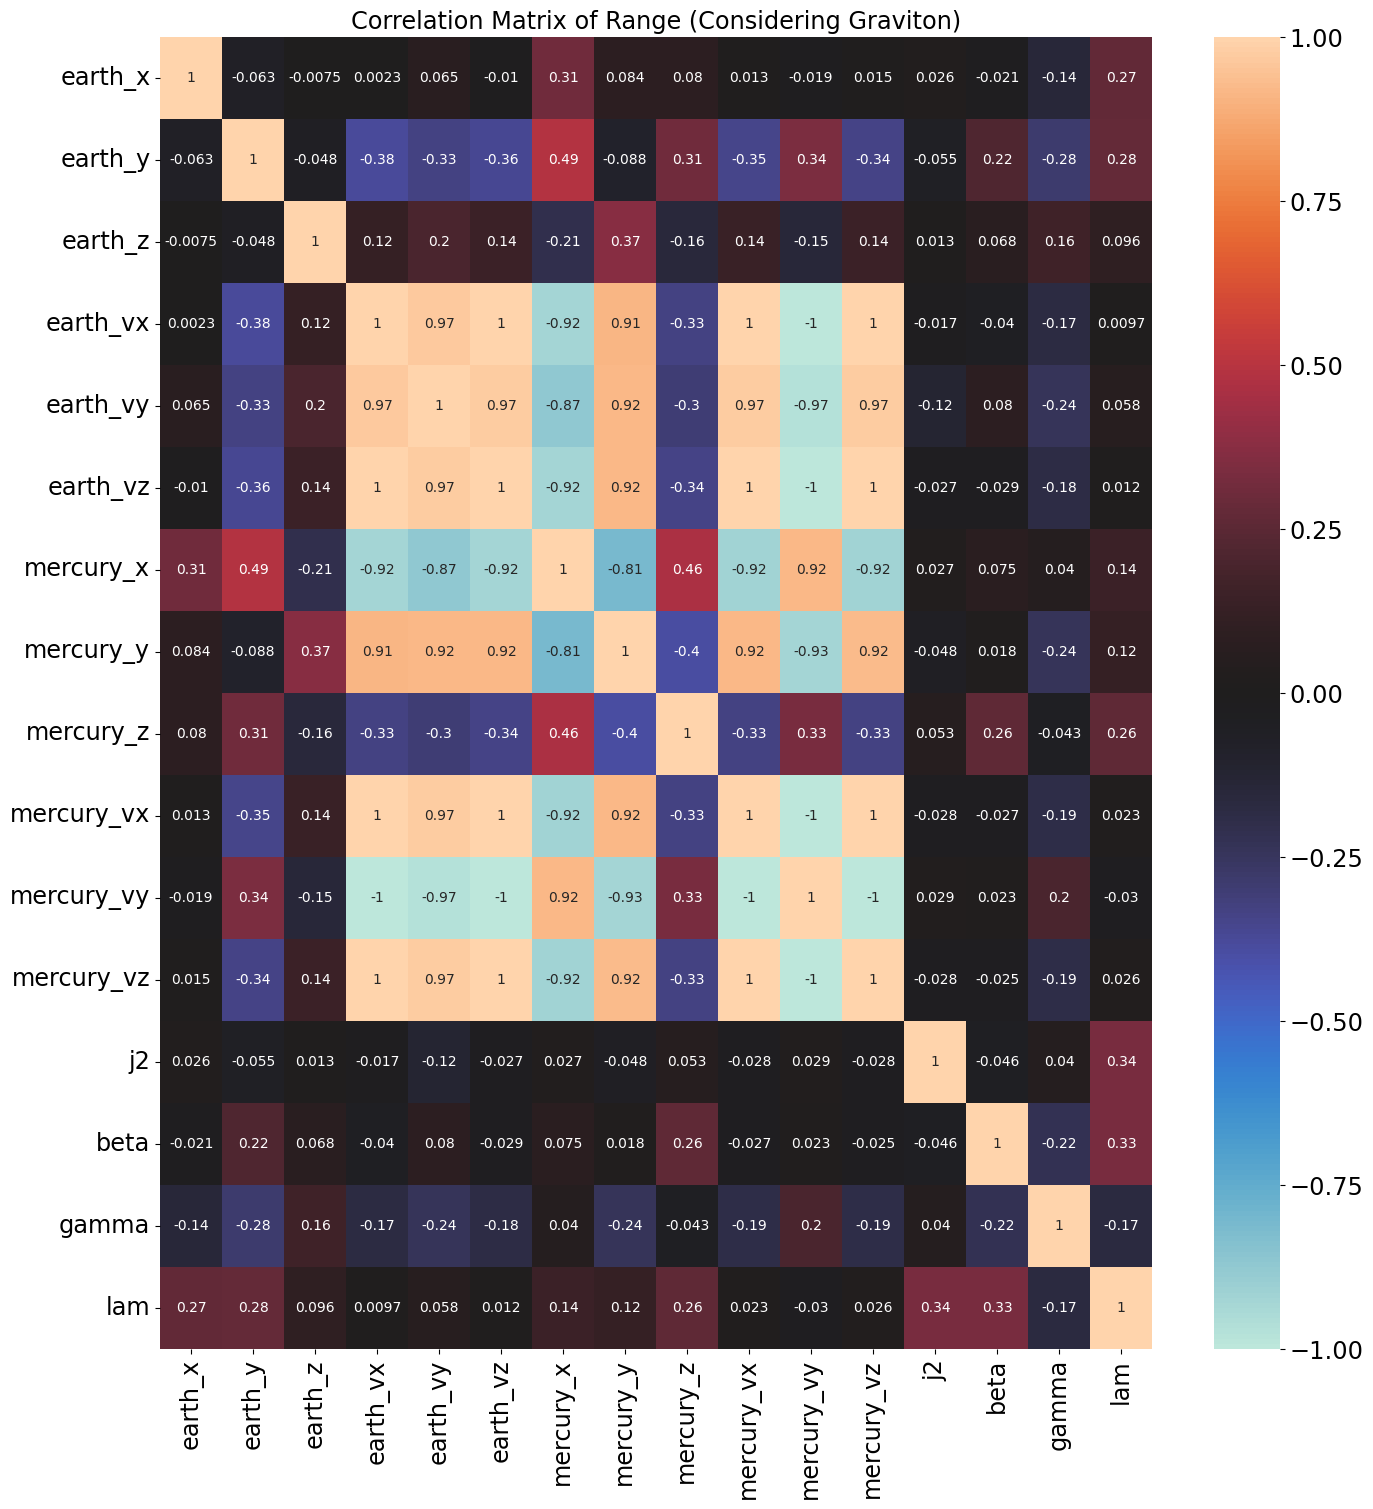

In [ ]:
import seaborn as sns
plt.figure(figsize=(16, 16))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, annot = True, xticklabels=parameters, yticklabels=parameters)
plt.title("Correlation Matrix of Range (Considering Graviton)")


Text(0.5, 1.0, 'Covariance Matrix of Range (Considering Graviton)')

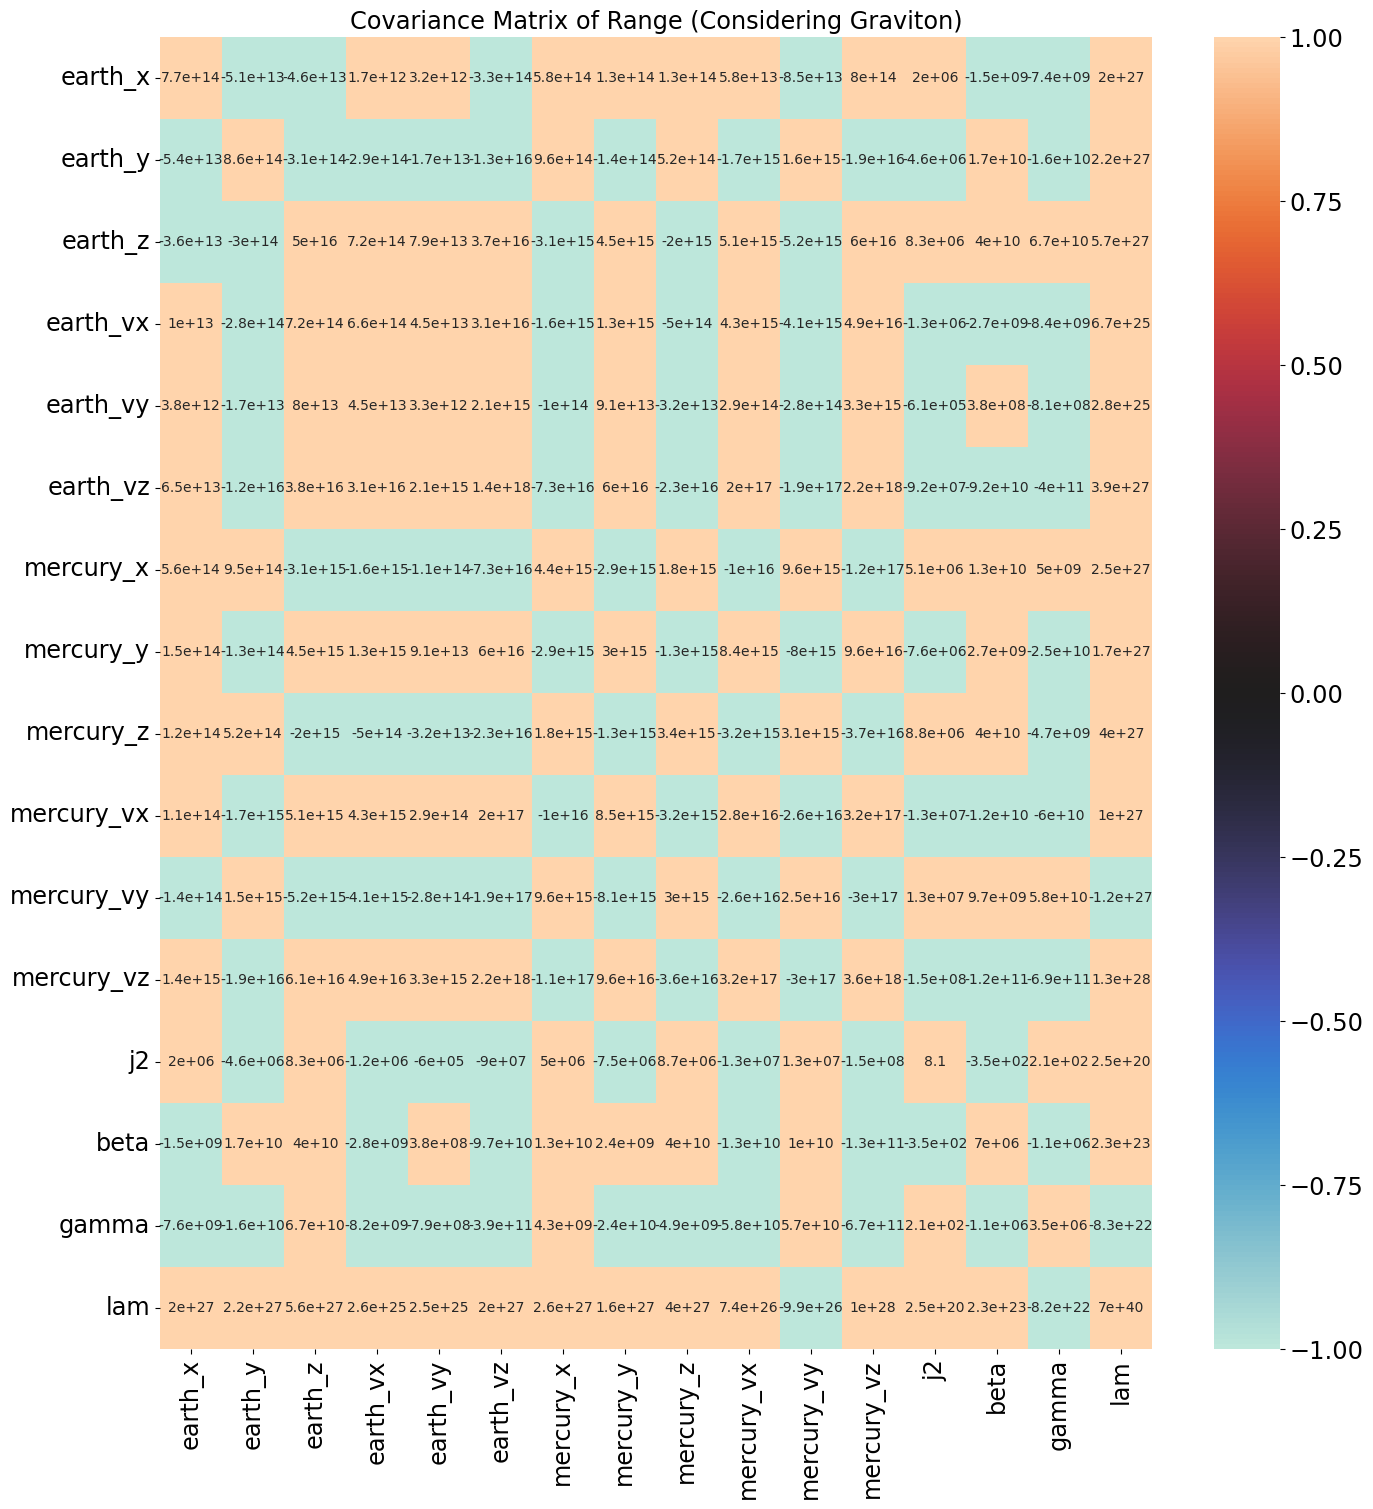

In [ ]:
import seaborn as sns
plt.figure(figsize=(16, 16))
sns.heatmap(cov,vmin=-1, vmax=1, center=0, annot = True, xticklabels=parameters, yticklabels=parameters)
plt.title("Covariance Matrix of Range (Considering Graviton)")

# Fitting parameters

In [ ]:


rho_shap0 = load_data_from_pickle('rho_shap_lam_add_00.pkl') # simulation wtih modification in lam
rho_shap00 = m_g_val_compute_output[m_g_val[0]]['EM_shap'] # simulation without modification in lam
O = (rho_shap0-rho_shap00) #observable ( difference)


cov_O = np.matmul(np.matmul(np.linalg.inv(np.matmul(JT,J)),JT),O) #fit parameters
res = O - np.matmul(J,cov_O) #residuals
chi_square = np.matmul(np.transpose(res),res)
scale = np.matmul(np.transpose(res),res)/(Nout-len(dx_values)) ## what should N_obs mean? ?
cov_vecS = cov_vec*scale

print('\nDelta in initial conditions: '+str(cov_O))
print('Fit errors due to uncertainties on the residuals: '+str(np.sqrt(cov_vecS)))
print('Fit errors due to uncertainties on the residuals wo scale: '+str(np.sqrt(cov_vec)))


Delta in initial conditions: [-4.60810607e-03 -8.28275587e-02  3.25856779e-03  7.11609356e-03
  8.70892390e-04  2.43213327e-01 -3.23232190e-02 -6.21106834e-02
  1.58810495e-01  2.78542867e-02 -1.73905870e-02  2.55360710e-01
  1.69802187e-09  3.64000203e-06  3.58963867e-06  5.01381244e+11]
Fit errors due to uncertainties on the residuals: [5.04165145e+01 5.31237535e+01 4.04182762e+02 4.67774224e+01
 3.27429923e+00 2.15072644e+03 1.20791911e+02 9.95365042e+01
 1.05037010e+02 3.03596079e+02 2.86801073e+02 3.43201258e+03
 5.17406246e-06 4.78981751e-03 3.40477022e-03 4.81031057e+14]
Fit errors due to uncertainties on the residuals wo scale: [2.77863525e+07 2.92784092e+07 2.22759642e+08 2.57807181e+07
 1.80458395e+06 1.18534261e+09 6.65727619e+07 5.48581437e+07
 5.78896700e+07 1.67322707e+08 1.58066375e+08 1.89150544e+09
 2.85161172e+00 2.63984052e+03 1.87649120e+03 2.65113498e+20]


(array([15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-8.28275587e-02,  5.01381244e+10,  1.00276249e+11,  1.50414373e+11,
         2.00552498e+11,  2.50690622e+11,  3.00828746e+11,  3.50966871e+11,
         4.01104995e+11,  4.51243119e+11,  5.01381244e+11]),
 <BarContainer object of 10 artists>)

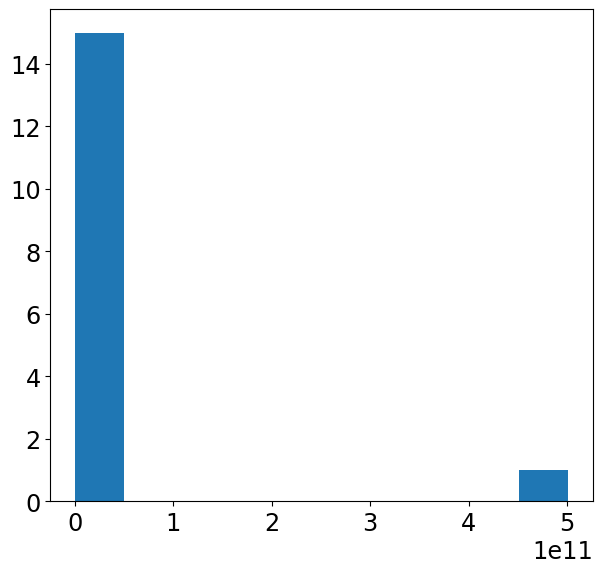

In [ ]:
plt.hist(cov_O)

(array([15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([5.17406246e-06, 4.81031057e+13, 9.62062114e+13, 1.44309317e+14,
        1.92412423e+14, 2.40515529e+14, 2.88618634e+14, 3.36721740e+14,
        3.84824846e+14, 4.32927951e+14, 4.81031057e+14]),
 <BarContainer object of 10 artists>)

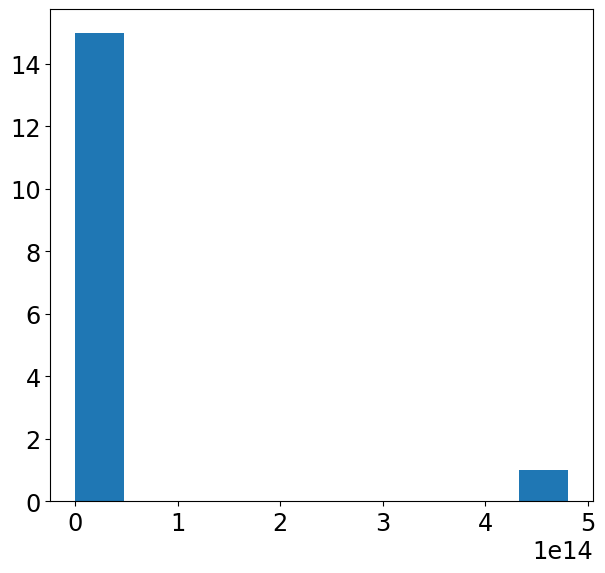

In [ ]:
plt.hist(np.sqrt(cov_vecS))

(array([15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.85161172e+00, 2.65113498e+19, 5.30226997e+19, 7.95340495e+19,
        1.06045399e+20, 1.32556749e+20, 1.59068099e+20, 1.85579449e+20,
        2.12090799e+20, 2.38602149e+20, 2.65113498e+20]),
 <BarContainer object of 10 artists>)

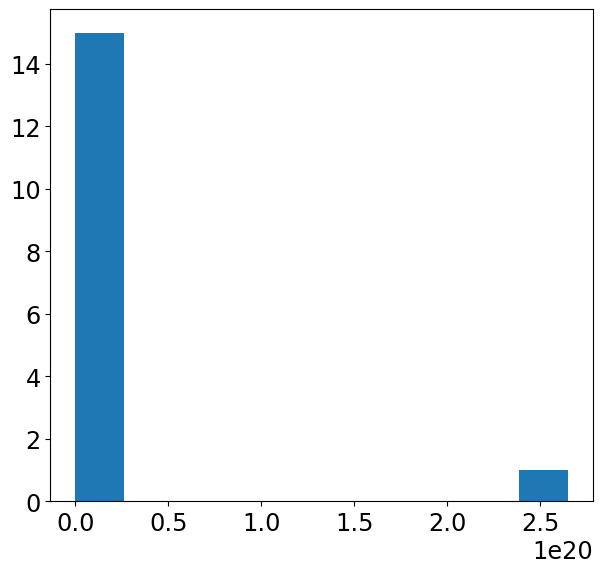

In [ ]:
plt.hist(np.sqrt(cov_vec))

Text(0.5, 1.0, 'Range difference with respect to Graviton change')

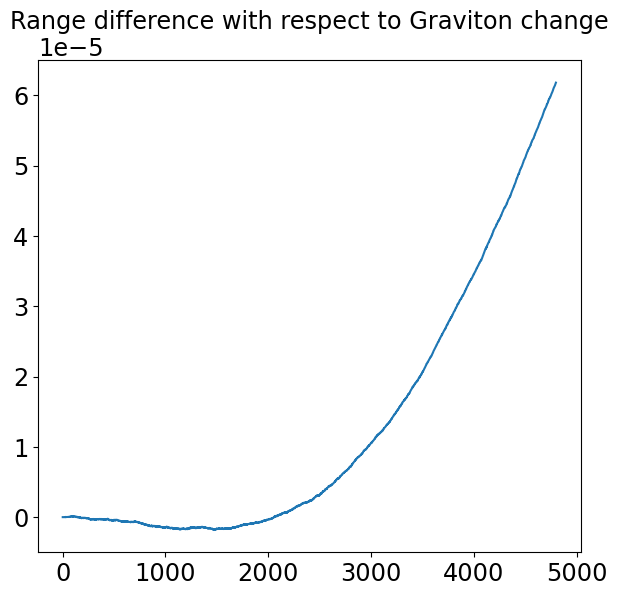

In [ ]:
plt.plot(O)

plt.title("Range difference with respect to Graviton change")

# Doppler Calculation

In [ ]:
def doppler_func(rho_shap):
  '''
  rho->i+1 and rho
  '''
  doppler_val = []
  for i in range(len(times) - 1): # Iterate using integers instead of floating-point numbers from times
    doppler_val.append((rho_shap[i+1]-rho_shap[i])/time_step)

  return doppler_val

print("loop done")

loop done


In [ ]:
### Computing for Doppler from pkl files
Do_HT = [] ## partial derivatives matrix (transpose)
for key in dx_values.keys():
  rho_shap_del_sub = load_data_from_pickle(f'rho_shap_{key}_sub_00.pkl')
  rho_shap_del_add = load_data_from_pickle(f'rho_shap_{key}_add_00.pkl')
  dop_rho_sub = doppler_func(rho_shap_del_sub)
  dop_rho_add = doppler_func(rho_shap_del_add)
  Do_HT.append((np.array(dop_rho_add)-np.array(dop_rho_sub))/(2*dx_values[key]))
JTo = np.asarray(Do_HT)
Jo = np.transpose(Do_HT) ## Jacobian for doppler

In [ ]:
W=(np.identity((Nout-1)) * ((1.2e-8)*86400)**2)
print(W.shape)
print(Jo.shape)
WJo=np.matmul(W,Jo)
covO = np.linalg.inv(np.matmul(JTo,WJo)) #covariance matrix
cov_vecO = np.diag(covO) #variance vector (diagonal elements of cov)
print(np.sqrt(cov_vecO))#sqrt of diagonal of cov

corr = np.ones_like(covO) #correlation vector
for i in range(covO.shape[0]-1):
    for j in range(i+1,covO.shape[1]):
        corr[i][j] = covO[i][j]/np.sqrt(np.abs(cov_vecO[j]*cov_vecO[i]))
        corr[j][i] = corr[i][j]*1.

print(np.shape(corr))
print(cov_vec)#diagonal of cov

(4799, 4799)
(4799, 16)
[7.62089989e+04 8.00114983e+04 1.26971979e+05 6.76557514e+04
 3.96185439e+04 1.73569946e+06 9.39368707e+04 9.47008882e+04
 1.08217392e+05 2.46065478e+05 2.31414900e+05 2.74652853e+06
 8.03407389e-03 8.23398815e+00 7.82140074e+00 8.08014330e+17]
(16, 16)
[7.72081387e+14 8.57225247e+14 4.96218581e+16 6.64645428e+14
 3.25652322e+12 1.40503711e+18 4.43193262e+15 3.00941592e+15
 3.35121389e+15 2.79968882e+16 2.49849791e+16 3.57779283e+18
 8.13168939e+00 6.96875798e+06 3.52121921e+06 7.02851670e+40]


Text(0.5, 1.0, 'Correlation Matrix for Doppler Effect')

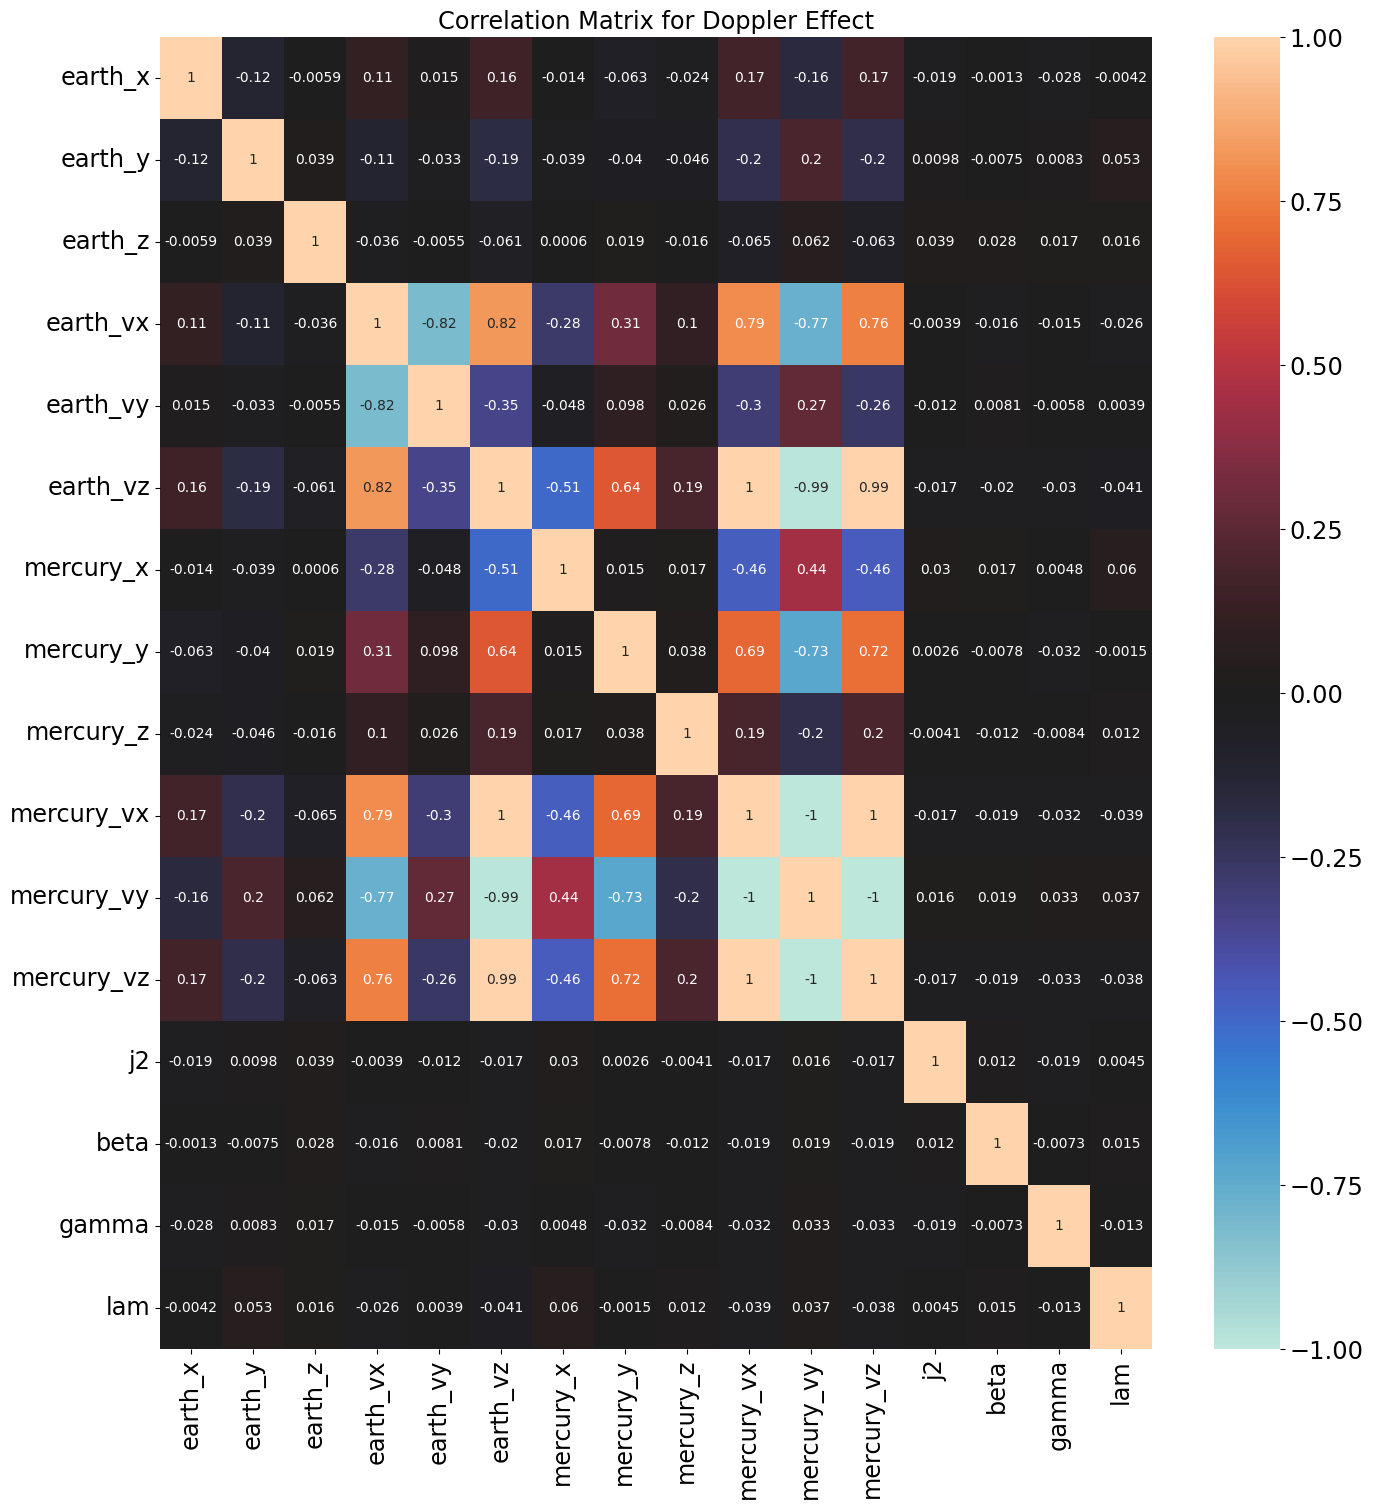

In [ ]:
parameters = dx_values.keys()
import seaborn as sns
plt.figure(figsize=(16, 16))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, annot = True, xticklabels=parameters, yticklabels=parameters
)
plt.title("Correlation Matrix for Doppler Effect")


Text(0.5, 1.0, 'Covariance Matrix for Doppler Effect')

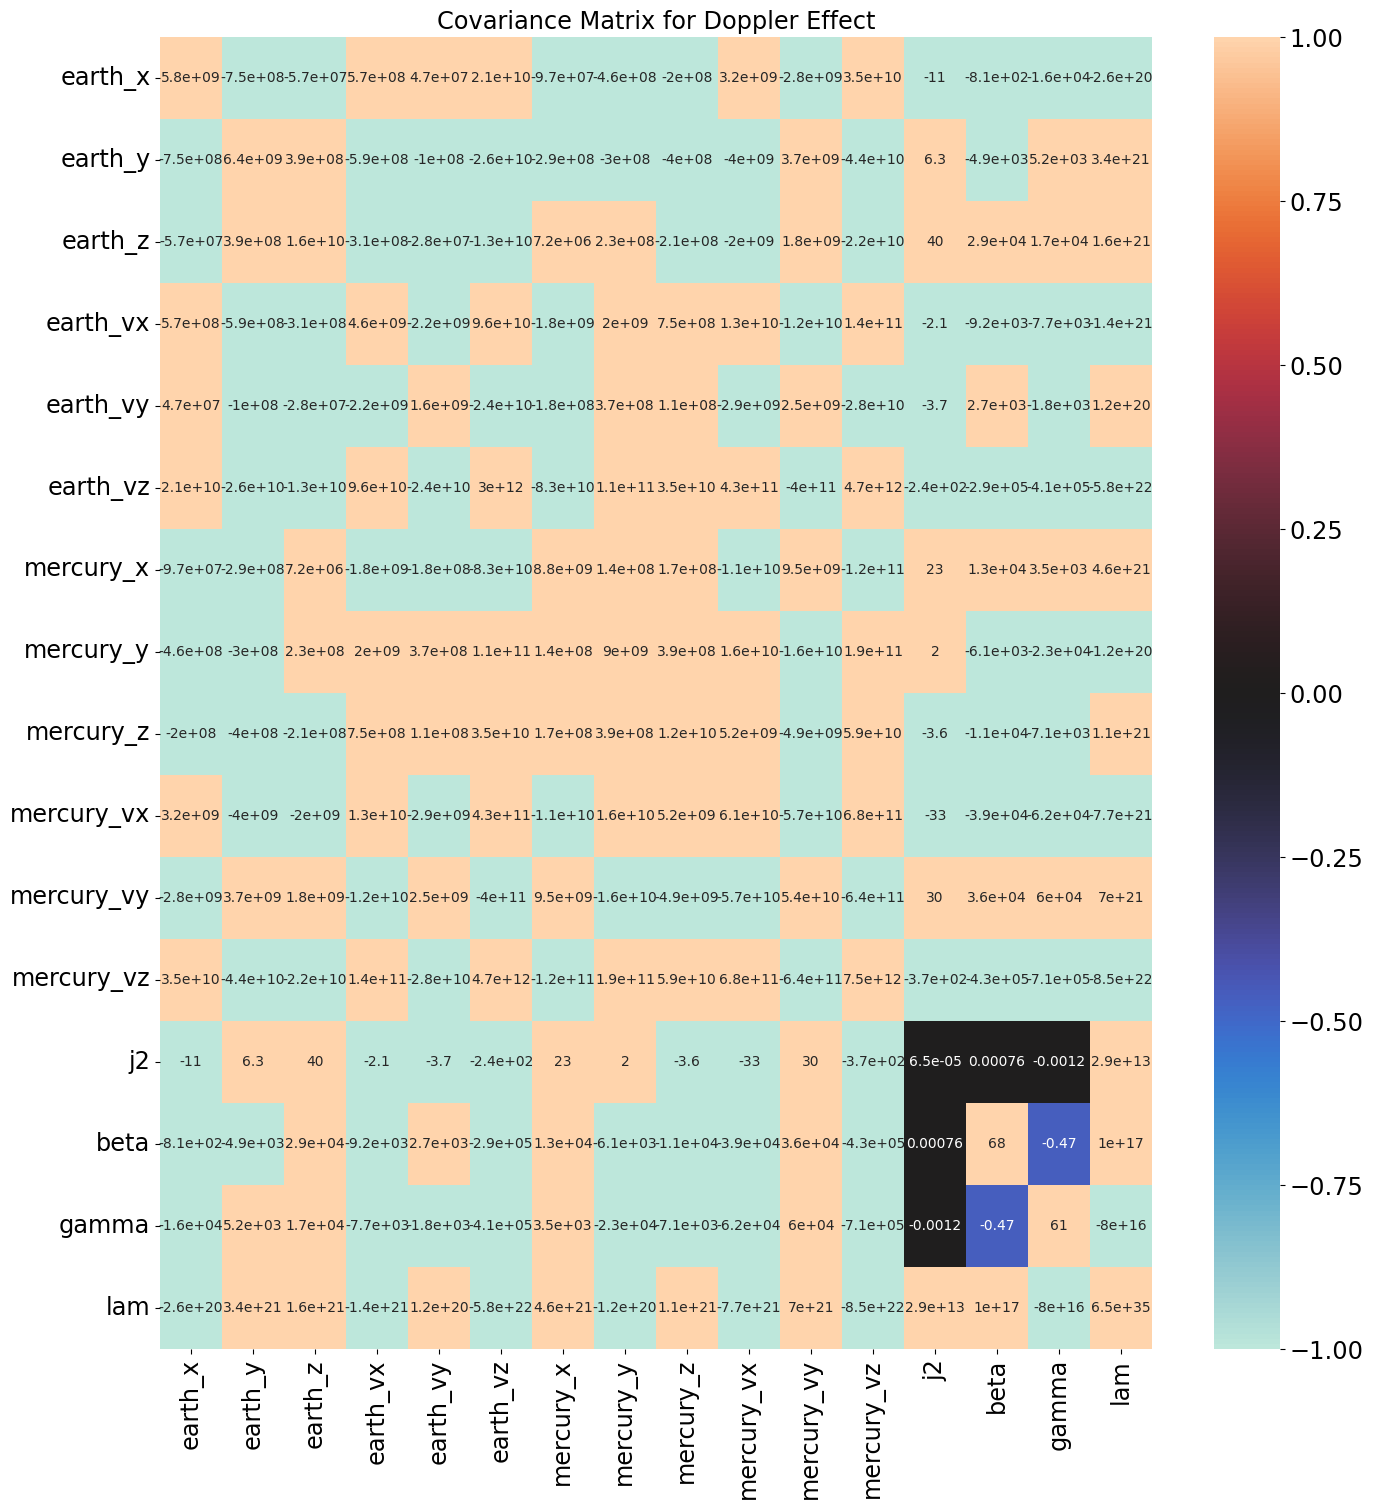

In [ ]:
parameters = dx_values.keys()
import seaborn as sns
plt.figure(figsize=(16, 16))
sns.heatmap(covO,vmin=-1, vmax=1, center=0, annot = True, xticklabels=parameters, yticklabels=parameters
)
plt.title("Covariance Matrix for Doppler Effect")
